In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
cv2.ocl.setUseOpenCL(False)
import warnings
warnings.filterwarnings('ignore')

In [2]:
feature_extraction_algo = 'sift'

feature_to_match = 'bf'


Text(0.5, 0, 'train_photo (photo to transform)')

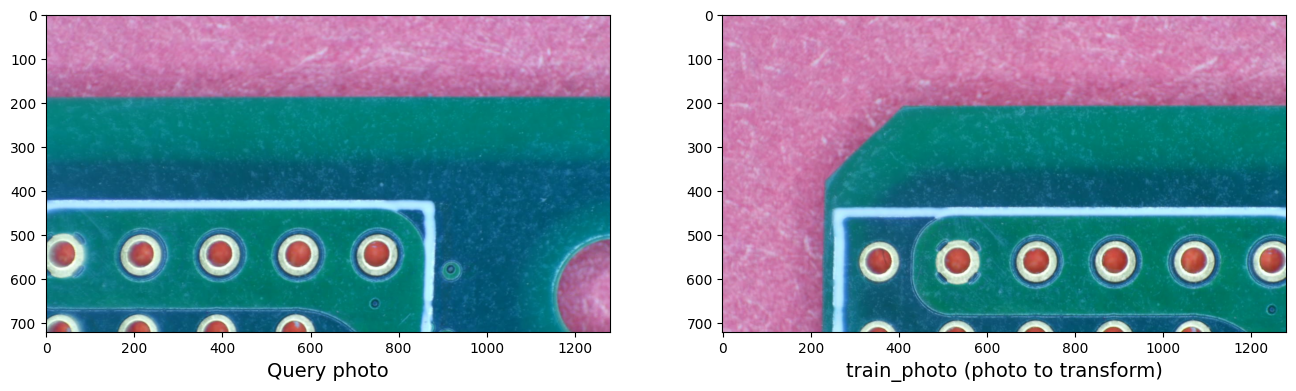

In [3]:
train_photo =cv2.imread('images/002.jpg')

train_photo =cv2.cvtColor(train_photo, cv2.COLOR_BGR2RGB)

train_photo_gray = cv2.cvtColor(train_photo, cv2.COLOR_BGR2GRAY)


query_photo = cv2.imread('images/001.jpg')

query_photo = cv2.cvtColor(query_photo, cv2.COLOR_BGR2RGB)

query_photo_gray = cv2.cvtColor(query_photo, cv2.COLOR_BGR2GRAY)

fig,(ax1,ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout = False, figsize=(16,9))
ax1.imshow(train_photo, cmap='gray')
ax1.set_xlabel('Query photo', fontsize=14)

ax2.imshow(query_photo, cmap='gray')
ax2.set_xlabel('train_photo (photo to transform)', fontsize=14)


In [4]:
def select_descriptor_method(image, method=None):
    
    assert method is not None, "Please define a descriptor method. Accepted values are: 'sift', 'surf', 'orb', 'brisk' "
    
    if method == 'sift':
        descriptor = cv2.SIFT_create()
    if method == 'surf':
        descriptor = cv2.SURF_create()
    if method == 'orb':
        descriptor = cv2.ORB_create()
    if method == 'brisk':
        descriptor = cv2.BRISK_create()
    
    (keypoints, features) = descriptor.detectAndCompute(image, None)
    
    return (keypoints, features)

In [5]:
keypoints_train_img, feature_train_img = select_descriptor_method(train_photo_gray, feature_extraction_algo)

keypoints_query_img, feature_query_img = select_descriptor_method(query_photo_gray, feature_extraction_algo)

#print('keypoints_query_img', keypoints_query_img)
#print('feature_query_img', feature_query_img)


In [6]:
for keypoint in keypoints_query_img:
    x,y =keypoint.pt 
    size = keypoint.size
    orientation = keypoint.angle
    response = keypoint.response
    octave = keypoint.octave
    class_id=keypoint.class_id
    
print("x,y ",x,y)
print("size ",size)
print("orientation ",orientation)
print("response ",response)
print("octave ",octave)
print("class_id ",class_id)


x,y  1276.906005859375 505.1976013183594
size  2.138427257537842
orientation  109.13089752197266
response  0.016992608085274696
octave  12648959
class_id  -1


In [7]:
feature_query_img.shape

(1234, 128)

In [8]:
len(keypoints_query_img)

1234

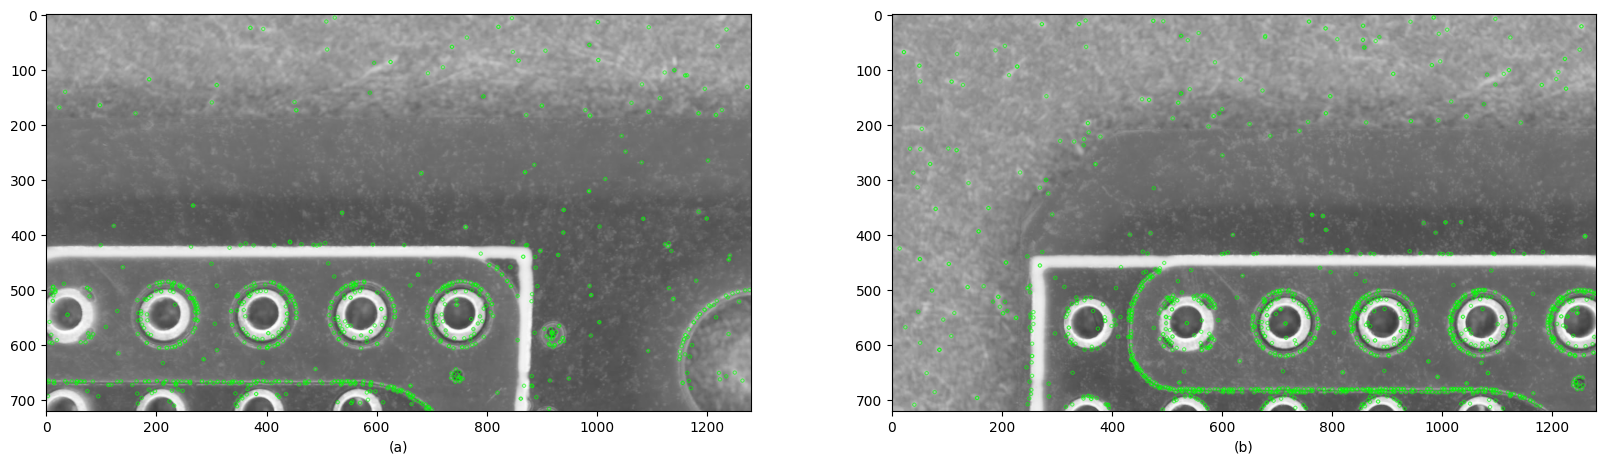

In [9]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(20,8), constrained_layout = False)

ax1.imshow(cv2.drawKeypoints(train_photo_gray, keypoints_train_img, None, color=(0,255,0)))

ax1.set_xlabel('(a)')

ax2.imshow(cv2.drawKeypoints(query_photo_gray, keypoints_query_img, None, color=(0,255,0)))

ax2.set_xlabel('(b)')

#plt.savefig('feature.jpeg', bbox_inches = 'tight', dpi=300, optimize=True, format='jpeg')

plt.show()

In [10]:
def create_matching_object(method, crossCheck):
    if method == 'sift' or method == 'surf':
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=crossCheck)
    elif method == 'orb' or method == 'brisk':
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=crossCheck)
    
    return bf

In [11]:
def key_points_matcing(feature_train_img, feature_query_img, method):
    bf = create_matching_object(method=method, crossCheck=True)
    
    best_mathces = bf.match(feature_train_img, feature_query_img)
    
    raw_matches = sorted(best_mathces, key =lambda x: x.distance)
    print('Raw matches with Brute Force', len(raw_matches))
    
    return raw_matches

In [12]:
def key_points_matcing_KNN(feature_train_img, feature_query_img, ratio, method):
    bf = create_matching_object(method=method, crossCheck=False)
    
    raw_matches = bf.knnMatch(feature_train_img, feature_query_img, k=2)
    print('Raw matches with KNN', len(raw_matches))
    
    knn_matches = []
    
    for m,n in raw_matches:
        if m.distance < n.distance * ratio:
            knn_matches.append(m)    
    
    return knn_matches

Drawing mathed features for bf
Raw matches with Brute Force 337


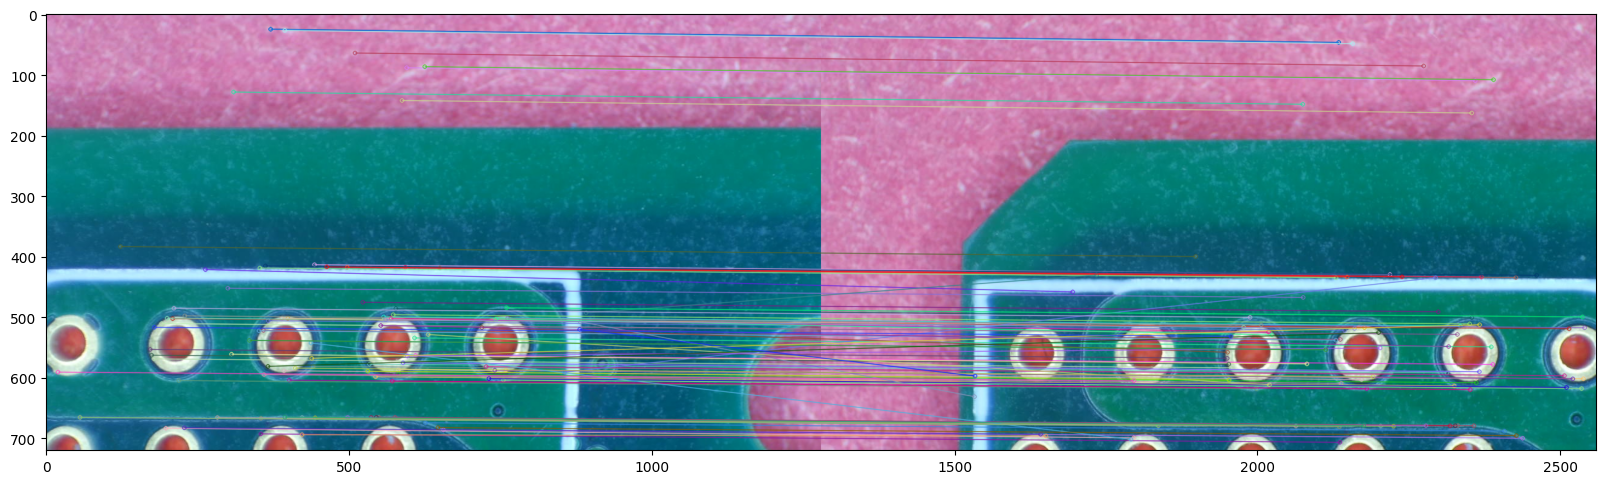

In [13]:
print('Drawing mathed features for', feature_to_match)

fig = plt.figure(figsize=(20,8))

if feature_to_match == 'bf':
    matches = key_points_matcing(feature_train_img, feature_query_img, method=feature_extraction_algo)
    
    mapped_feature_image = cv2.drawMatches(train_photo, keypoints_train_img, query_photo, keypoints_query_img, matches[:100], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
elif feature_to_match == 'knn':
    matches = key_points_matcing_KNN(feature_train_img, feature_query_img, method=feature_extraction_algo)
    
    mapped_feature_image_knn = cv2.drawMatches(train_photo, keypoints_train_img, query_photo, keypoints_query_img, np.random.choice(matches, 100), None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(mapped_feature_image)

Drawing mathed features for knn
Raw matches with KNN 818


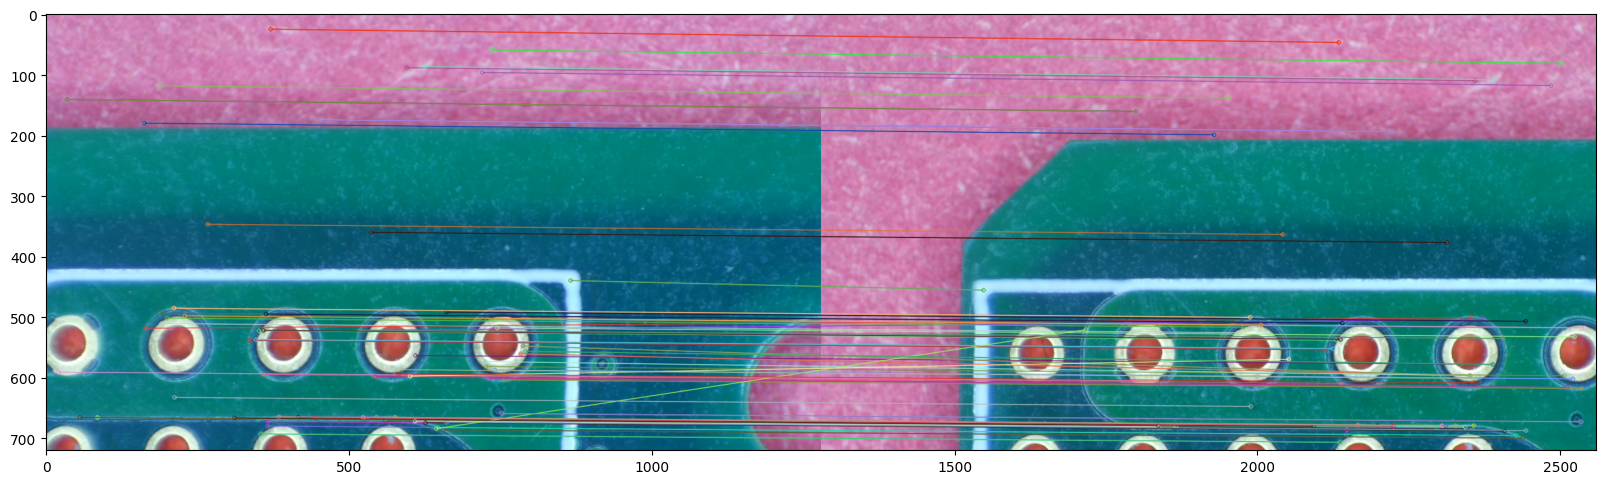

In [14]:
feature_to_match = 'knn'

print('Drawing mathed features for', feature_to_match)

fig = plt.figure(figsize=(20,8))

if feature_to_match == 'bf':
    matches = key_points_matcing(feature_train_img, feature_query_img, method=feature_extraction_algo)
    
    mapped_feature_image = cv2.drawMatches(train_photo, keypoints_train_img, query_photo, keypoints_query_img, matches[:100], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
elif feature_to_match == 'knn':
    matches = key_points_matcing_KNN(feature_train_img, feature_query_img, ratio= 0.75, method=feature_extraction_algo)
    
    mapped_feature_image_knn = cv2.drawMatches(train_photo, keypoints_train_img, query_photo, keypoints_query_img, np.random.choice(matches, 100), None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(mapped_feature_image_knn)

In [15]:
def homography_stitching(keypoints_train_img, keypoints_query_img, matches, reprojThresh):
    # converte to numpy array
    
    keypoints_train_img = np.float32([keypoint.pt for keypoint in keypoints_train_img])
    keypoints_query_img = np.float32([keypoint.pt for keypoint in keypoints_query_img])
    
    if len(matches) > 4:
        points_train = np.float32([keypoints_train_img[m.queryIdx] for m in matches])
        points_query = np.float32([keypoints_query_img[m.trainIdx] for m in matches])
        
        (H, status) = cv2.findHomography(points_train, points_query, cv2.RANSAC, reprojThresh)
        
        return(matches, H ,status)
    
    else:
        return None
    

In [16]:
def affine(keypoints_train_img,keypoints_query_img,matches):
    
    prev_matched_key = np.float32([keypoints_train_img[match.queryIdx].pt for match in matches]).reshape(-1, 1, 2)
    next_matched_key = np.float32([keypoints_query_img[match.trainIdx].pt for match in matches]).reshape(-1, 1, 2)
    
    M, _ = cv2.estimateAffinePartial2D(prev_matched_key, next_matched_key, cv2.RANSAC)
    
    return M

In [17]:
def decompose_homography(H):
    # Normalize homography matrix
    H = H / H[2, 2]
    
    # Extract rotation and scaling
    rotation_and_scale = H[:2, :2]
    scale = np.linalg.norm(rotation_and_scale[:, 0])
    rotation = rotation_and_scale / scale
    
    # Extract translation
    translation = H[:2, 2]
    
    # Calculate shear
    shear = np.arctan2(rotation[0, 1], rotation[1, 1])
    
    return rotation, scale, translation, shear

In [18]:
def compose_homography(rotation, scale, translation, shear):
    # Construct rotation matrix
    rotation_matrix = rotation
    
    # Construct shear matrix
    shear_matrix = np.array([[1, shear],
                             [0, 1]])
    
    # Construct scaling matrix
    scaling_matrix = np.diag([scale, scale])
    
    # Combine rotation, shear, and scaling matrices
    affine_matrix = np.matmul(rotation_matrix, shear_matrix)
    affine_matrix = np.matmul(affine_matrix, scaling_matrix)
    
    # Append translation vector to the affine matrix
    affine_matrix = np.column_stack([affine_matrix, translation])
    affine_matrix = np.vstack([affine_matrix, [0, 0, 1]])
    
    return affine_matrix

In [19]:
M = homography_stitching(keypoints_train_img=keypoints_train_img, keypoints_query_img=keypoints_query_img, matches=matches, reprojThresh=4)
# Affine = affine(keypoints_train_img=keypoints_train_img, keypoints_query_img=keypoints_query_img, matches=matches)
# print(Affine)
if M is None:
    print('Error')
    
(matches, Homography_Matrix, status) = M
print('Homography matrix\n',Homography_Matrix)

# # Perform Singular Value Decomposition (SVD)
# U, s, Vt = np.linalg.svd(Homography_Matrix)

# # Extract rotation matrix
# R = U @ Vt

# # Extract translation vector
# translateMatrix = Homography_Matrix[:, 2] / Homography_Matrix[2, 2]
# translateMatrix = np.array([[1,0,translateMatrix[0]],[0,1,translateMatrix[1]],[0,0,translateMatrix[2]]],np.float32)
# # Extract scale matrix
# scale_matrix = np.diag(s)

# # Extract shear matrix
# shear_matrix = R / scale_matrix
# shear_matrix = np.array([[shear_matrix[0,0],0,0],[0,shear_matrix[1,1],0],[0,0,shear_matrix[2,2]]],np.float32)
# print("\nRotation matrix:")
# print(R)
# print("\nTranslation matrix:")
# print(translateMatrix)
# print("\nScale matrix:")
# print(scale_matrix)
# print("\nShear matrix:")
# print(shear_matrix)

# H = R @ translateMatrix @ shear_matrix @ scale_matrix
# print('\nCompose homography\n', H)

# Decompose homography matrix
rotation, scale, translation, shear = decompose_homography(Homography_Matrix)

# Print components
print("Rotation:\n", rotation)
print("Scale:", scale)
print("Translation:", translation)
print("Shear:", shear)

H = compose_homography(rotation,scale,translation, shear)
print('Composed homography\n',H)

Homography matrix
 [[ 1.00353341e+00  2.45155244e-02  4.82940230e+02]
 [ 1.58512833e-03  9.85933129e-01  2.14661034e+01]
 [ 2.64811135e-06 -3.61413544e-06  1.00000000e+00]]
Rotation:
 [[0.99999875 0.02442918]
 [0.00157955 0.98246047]]
Scale: 1.0035346574531219
Translation: [482.94023011  21.46610336]
Shear: 0.024860178723981833
Composed homography
 [[1.00353341e+00 4.94635442e-02 4.82940230e+02]
 [1.58512833e-03 9.85972535e-01 2.14661034e+01]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [20]:
def trim(frame):
    #crop top
    if not np.sum(frame[0]):
        return trim(frame[1:])
    #crop bottom
    elif not np.sum(frame[-1]):
        return trim(frame[:-2])
    #crop left
    elif not np.sum(frame[:,0]):
        return trim(frame[:,1:]) 
    #crop right
    elif not np.sum(frame[:,-1]):
        return trim(frame[:,:-2])    
    return frame

[[[ 482.94022    21.466103]]

 [[ 546.25354  1283.511   ]]

 [[1205.4843     22.607395]]

 [[1268.7976   1284.6522  ]]]
[ 546.25354 1283.511  ]


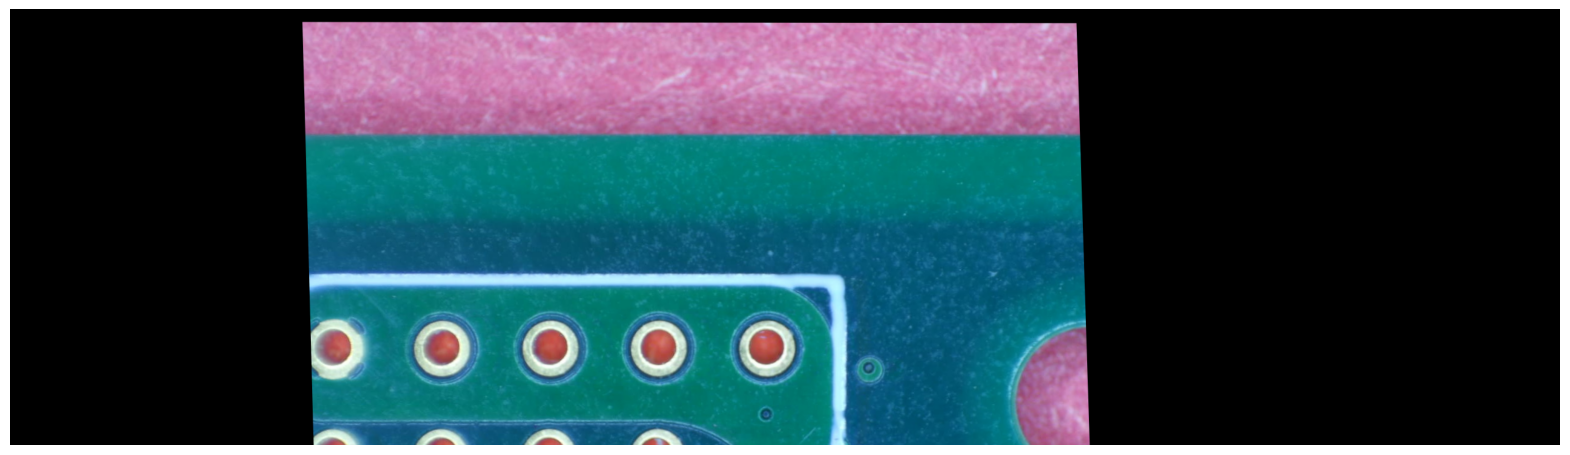

In [27]:
width = query_photo.shape[1] + train_photo.shape[1]
# print(width)

height = max(query_photo.shape[0], train_photo.shape[0])
# print(height)
# result = cv2.warpAffine(train_photo, M, (width,height))
old_points = np.array([[[0,0]],[[0,train_photo.shape[1]]],[[train_photo.shape[0],0]],[[train_photo.shape[0],train_photo.shape[1]]]],np.float32)
new_points = cv2.perspectiveTransform(old_points, H)
print(new_points)
result = cv2.warpPerspective(train_photo, Homography_Matrix, (width, height))
print (new_points[1][0])
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(result)

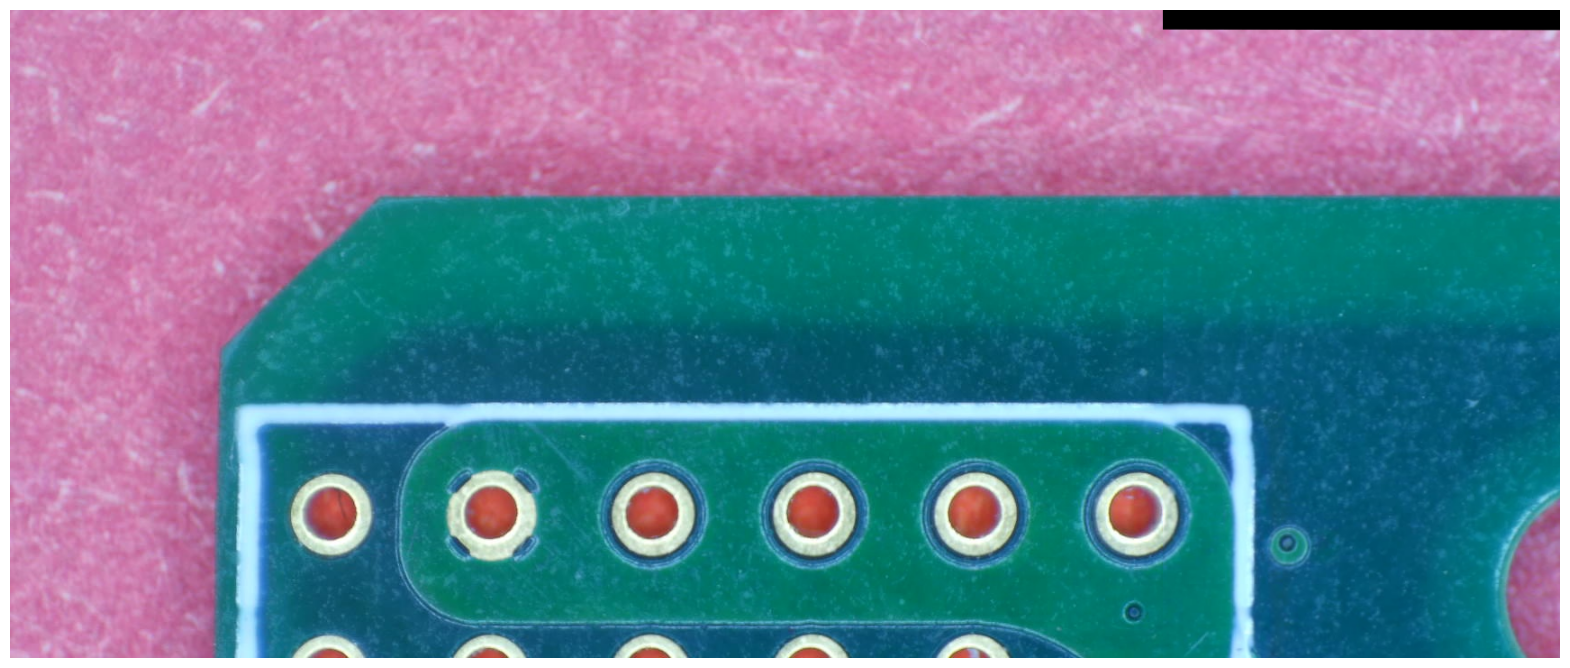

In [28]:
result[0:query_photo.shape[0],0:query_photo.shape[1]] = query_photo

result = trim(result)
result = result[0:result.shape[0],0:result.shape[1]-int(abs(new_points[2][0][0]-new_points[3][0][0]))]
cv2.imwrite(f'res.jpg',cv2.cvtColor(result, cv2.COLOR_RGB2BGR))
   
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(result)